# Deep Neural Network in Keras _1

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/suniltt/fdp2021/blob/main/deep_neural_network/deep_net_in_keras_1.ipynb)

#### Load dependencies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import SGD    #optimizer
import matplotlib as plt

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

#### Preprocess data

In [3]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [4]:
X_train /= 255
X_valid /= 255

In [5]:
n_classes = 10
#y_train = keras.utils.to_categorical(y_train, n_classes)
#y_valid = keras.utils.to_categorical(y_valid, n_classes)

y_train =keras.utils.np_utils.to_categorical (y_train, n_classes)
y_valid= keras.utils.np_utils.to_categorical(y_valid, n_classes)
 

#### Design neural network architecture

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


##### __[Click here to Explore Relu Activation function](relu.ipynb)__

#### Configure model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])

##### __[Click here to Explore Cross Entropy ](cross_entropy.ipynb)__

#### Train!

In [9]:
history=model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4739 - accuracy: 0.8620 - val_loss: 0.2714 - val_accuracy: 0.9191
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2297 - accuracy: 0.9331 - val_loss: 0.1905 - val_accuracy: 0.9433
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1766 - accuracy: 0.9486 - val_loss: 0.1647 - val_accuracy: 0.9525
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1455 - accuracy: 0.9568 - val_loss: 0.1423 - val_accuracy: 0.9577
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9628 - val_loss: 0.1313 - val_accuracy: 0.9618
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1093 - accuracy: 0.9679 - val_loss: 0.1123 - val_accuracy: 0.9656
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.9713 - val_loss: 0.1132 - val_accuracy: 0.9653
Epoch 

In [10]:
test_case =X_valid[:1,:]

In [11]:
test_case.shape

(1, 784)

In [12]:
predicted_digit=model.predict(test_case)

In [13]:
predicted_digit  # This is an array with probabilities for each digit

array([[6.5567286e-07, 2.6604675e-07, 1.6843009e-05, 4.4167140e-05,
        1.1327476e-08, 2.6402958e-08, 1.8894127e-15, 9.9993634e-01,
        3.2629490e-08, 1.6321136e-06]], dtype=float32)

In [14]:
import numpy as np
np.argmax(predicted_digit,axis=1)

array([7])

In [15]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9743


[0.08381204307079315, 0.9743000268936157]

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


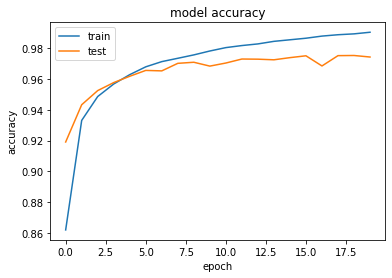

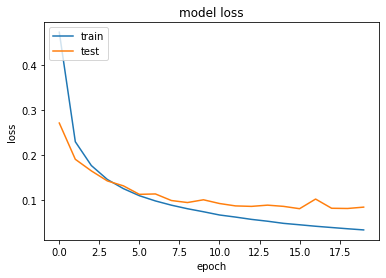

In [17]:
from matplotlib import pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()